In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium import webdriver

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [325]:
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.flipkart.com/search?q=earbuds&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=price_desc"
driver.get(url)


In [326]:
product_names = []
product_prices = []
product_discounts = []
product_desc = []
product_rating = []
product_rev = []

In [328]:
# Number of pages to scrape
num_pages = 25

for page in range(num_pages):
    time.sleep(5)  # Let page load
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    products = soup.find_all('div', class_='cPHDOP col-12-12')
    
    for item in products:
        name = item.find('a', class_='wjcEIp')
        price = item.find('div', class_='Nx9bqj')
        discount = item.find('div', class_='UkUFwK')
        rating = item.find('div', class_='XQDdHH')
        rev = item.find('span', class_='Wphh3N')
        
        product_names.append(name.get_text(strip=True) if name else 'N/A')
        product_prices.append(price.get_text(strip=True) if price else 'N/A')
        product_discounts.append(discount.get_text(strip=True) if discount else 'N/A')
        product_rating.append(rating.get_text(strip=True) if rating else 'N/A')
        product_rev.append(rev.get_text(strip=True) if rev else 'N/A')
        
    
    # Try clicking next page
    try:
        next_btn = driver.find_element("xpath", '//a[@class="_9QVEpD"]')
        next_btn.click()
    except Exception as e:
        print("Next page not found or end of pages.")
        break

driver.quit()

In [329]:
df = pd.DataFrame({
    'Product Name': product_names,
    'Price': product_prices,
    'Discount': product_discounts,
    'Rating': product_rating,
    'Review': product_rev
})

print(df.head(3))

                                        Product Name    Price Discount Rating  \
0                                                N/A      N/A      N/A    N/A   
1  Bose New QuietComfort Ultra Wireless Earbuds w...  ₹25,900   7% off    4.4   
2                Samsung Galaxy Buds 3 Pro Bluetooth  ₹19,999  20% off    4.5   

  Review  
0    N/A  
1   (62)  
2  (570)  


In [330]:
df

,Product Name,Price,Discount,Rating,Review
0,N/A,N/A,N/A,N/A,N/A
1,Bose New QuietComfort Ultra Wireless Earbuds w...,"₹25,900",7% off,4.4,(62)
2,Samsung Galaxy Buds 3 Pro Bluetooth,"₹19,999",20% off,4.5,(570)
3,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...","₹13,428",46% off,4.1,(499)
4,"Apple AirPods 4 Wireless Earbuds, Personalised...","₹11,499",10% off,4.3,"(1,963)"
...,...,...,...,...,...
3664,SANNO WORLD Smart Touch Earbuds with Quick Pai...,"₹5,000",49% off,N/A,N/A
3665,N/A,N/A,N/A,N/A,N/A
3666,N/A,N/A,N/A,N/A,N/A
3667,N/A,"₹22,990",7% off,4.6,N/A


In [332]:
df.to_csv("uncleaned_Earphones1.csv", index=False)

### DATA CLEANING

In [333]:
df = df.dropna(how="all")
df = df[~(df == 'N/A').all(axis=1)]

In [334]:
df = df.dropna(subset=['Price'])
df = df[df['Price'] != 'N/A']

In [335]:
df = df.dropna(subset=['Product Name'])
df = df[df['Product Name'] != 'N/A']

In [336]:
df = df.dropna(subset=['Discount'])
df = df[df['Discount'] != 'N/A']

In [337]:
df = df.dropna(subset=['Rating'])
df = df[df['Rating'] != 'N/A']

In [338]:
df = df.dropna(subset=['Review'])
df = df[df['Review'] != 'N/A']

In [300]:
# df = df.drop_duplicates()

In [339]:
df

,Product Name,Price,Discount,Rating,Review
1,Bose New QuietComfort Ultra Wireless Earbuds w...,"₹25,900",7% off,4.4,(62)
2,Samsung Galaxy Buds 3 Pro Bluetooth,"₹19,999",20% off,4.5,(570)
3,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...","₹13,428",46% off,4.1,(499)
4,"Apple AirPods 4 Wireless Earbuds, Personalised...","₹11,499",10% off,4.3,"(1,963)"
5,Google Pixel Buds Pro with Active Noise Cancel...,"₹9,990",49% off,4.5,"(4,199)"
...,...,...,...,...,...
3656,Marshall Minor IV Wireless Earbuds 30+ Hr of P...,"₹11,999",10% off,3.4,(42)
3657,OnePlus Buds Pro 3 - Midnight Opus Bluetooth,"₹9,999",28% off,4.4,"(1,443)"
3658,OnePlus Buds Pro 2 Bluetooth,"₹6,481",53% off,4.4,"(8,244)"
3659,"realme Buds Air 7 Pro with 53dB ANC,360 Spatia...","₹5,499",31% off,4.4,"(1,917)"


In [340]:
df.shape

(1050, 5)

In [341]:
df = df.rename(columns={'Product Name': 'Brand'})

In [342]:
df['Prices'] = df['Price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['Prices'] = df['Prices'].astype(float)

In [343]:
df=df.drop(['Price'],axis=1)

In [344]:
df['Discount'] = df['Discount'].str.extract(r'(\d+)').astype(int)

In [345]:
df['Review'] = df['Review'].str.replace(r"[()]", "", regex=True)

In [346]:
df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')

In [347]:
df['Review'] = df['Review'].astype(str).str.replace(",", "", regex=True)
df['Review'] = pd.to_numeric(df['Review'], errors="coerce")

In [348]:
df['Review'] = df['Review'].fillna("0")

In [349]:
df.dtypes

Brand        object
Discount      int32
Rating      float64
Review        int64
Prices      float64
dtype: object

In [350]:
df

,Brand,Discount,Rating,Review,Prices
1,Bose New QuietComfort Ultra Wireless Earbuds w...,7,4.4,62,25900.0
2,Samsung Galaxy Buds 3 Pro Bluetooth,20,4.5,570,19999.0
3,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...",46,4.1,499,13428.0
4,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,4.3,1963,11499.0
5,Google Pixel Buds Pro with Active Noise Cancel...,49,4.5,4199,9990.0
...,...,...,...,...,...
3656,Marshall Minor IV Wireless Earbuds 30+ Hr of P...,10,3.4,42,11999.0
3657,OnePlus Buds Pro 3 - Midnight Opus Bluetooth,28,4.4,1443,9999.0
3658,OnePlus Buds Pro 2 Bluetooth,53,4.4,8244,6481.0
3659,"realme Buds Air 7 Pro with 53dB ANC,360 Spatia...",31,4.4,1917,5499.0


In [351]:
df.isnull().sum()

Brand       0
Discount    0
Rating      0
Review      0
Prices      0
dtype: int64

In [378]:
df.to_csv("Earphones.csv", index=False)

## SQL

In [353]:
import sqlalchemy

In [354]:
engine = sqlalchemy.create_engine('mysql+pymysql://magnathan:Butti@24@localhost:3306/Earphones')

In [355]:
df.dtypes

Brand        object
Discount      int32
Rating      float64
Review        int64
Prices      float64
dtype: object

## EDA

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt

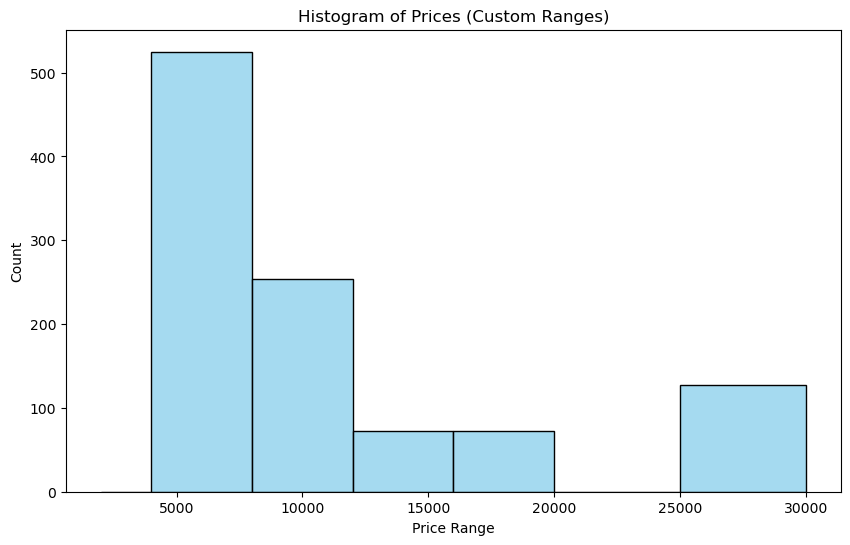

In [357]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Prices", bins=bins, color='skyblue', edgecolor='black')

plt.title("Histogram of Prices (Custom Ranges)")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

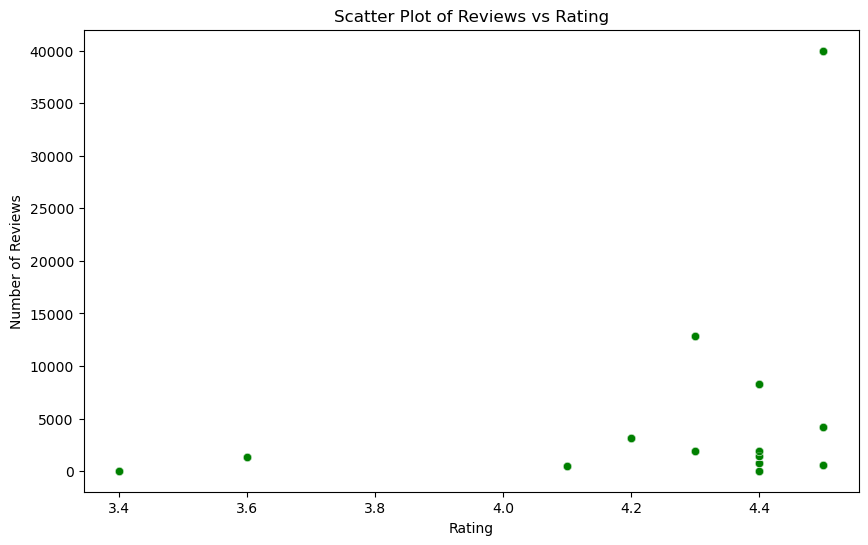

In [358]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Review', data=df, color='green', alpha=0.6)

plt.title('Scatter Plot of Reviews vs Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

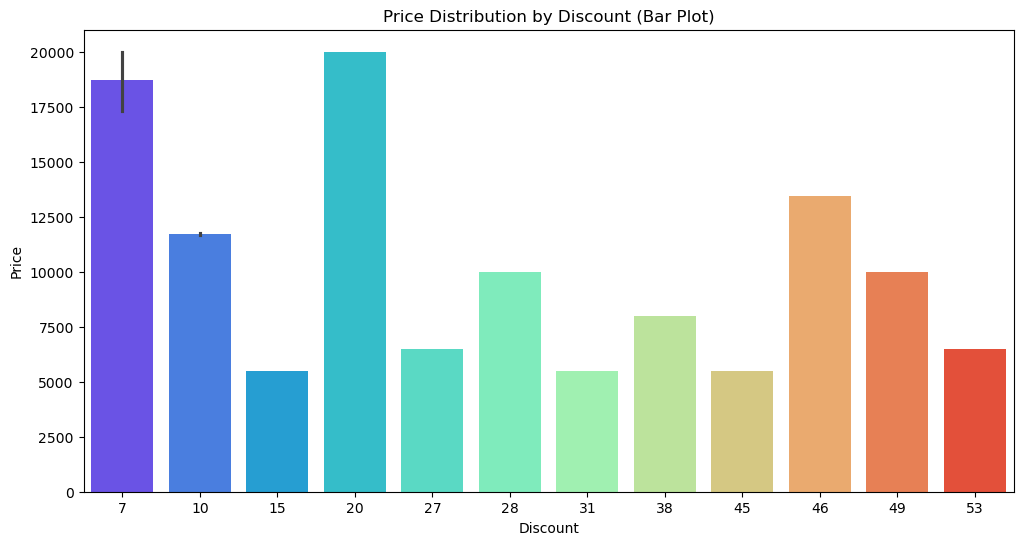

In [365]:
plt.figure(figsize=(12,6))
sns.barplot(x='Discount', y='Prices', data=df, palette='rainbow')

plt.title('Price Distribution by Discount (Bar Plot)')
plt.xlabel('Discount')
plt.ylabel('Price')
plt.show()

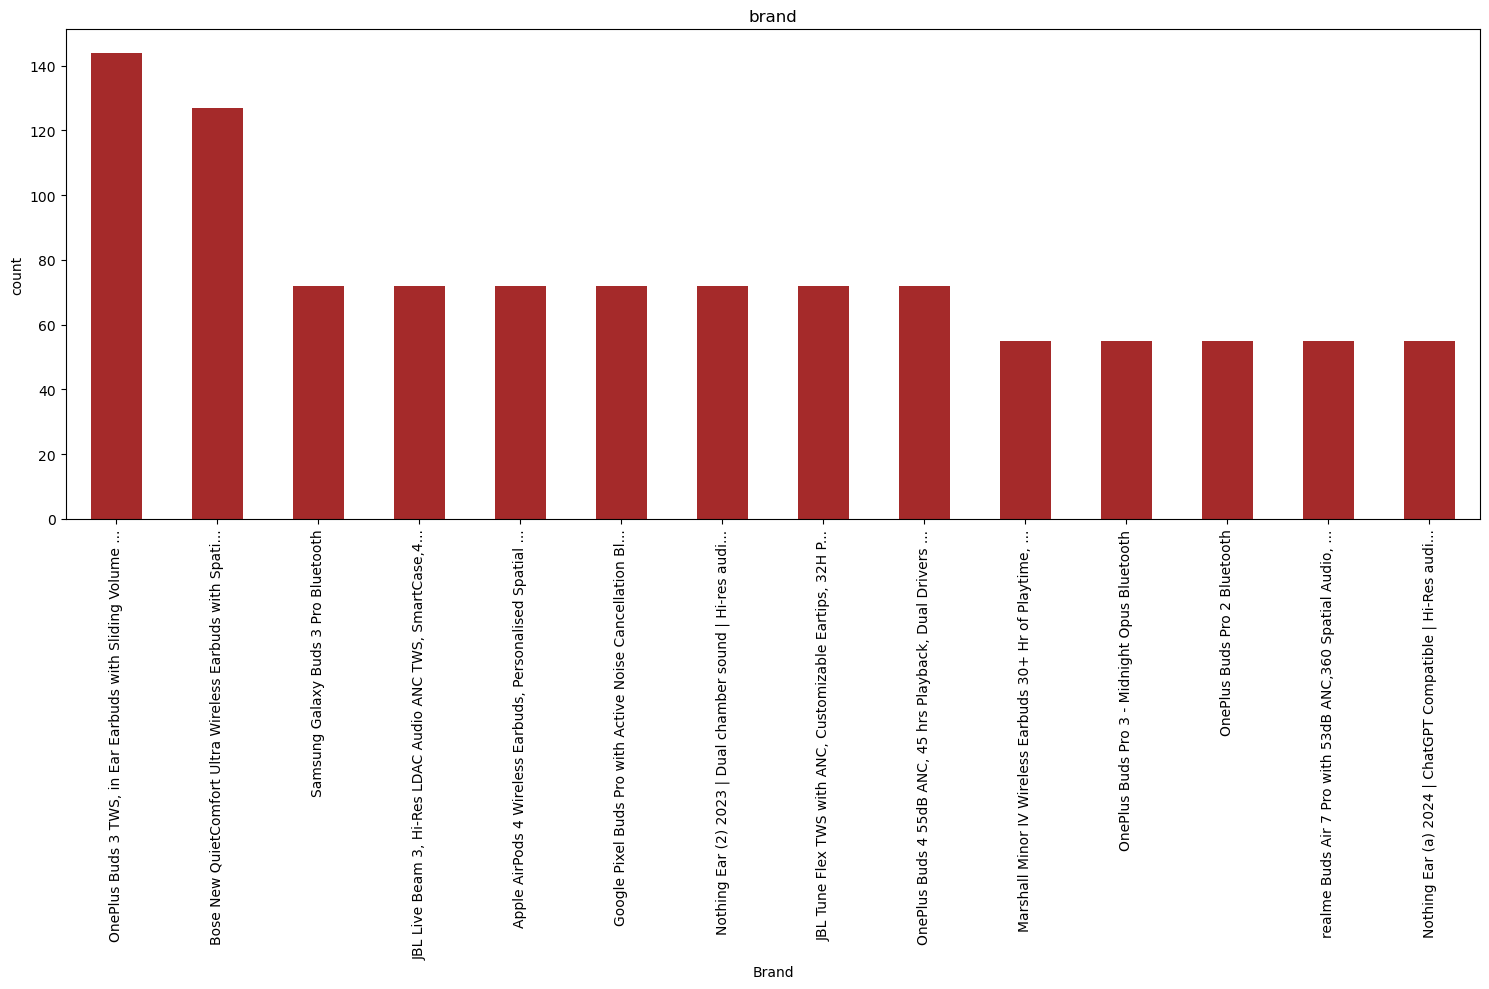

In [366]:
#univerient
plt.figure(figsize=(15, 10))
df['Brand'].value_counts().plot(kind='bar', color='brown')
plt.title('brand')
plt.xlabel('Brand')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [367]:
# Find the maximum value in Review column
max_review = df['Review'].max()
print("Maximum Review value:", max_review)

Maximum Review value: 39987


In [368]:
max_review = df['Prices'].max()
print("Maximum price value:", max_review)

Maximum price value: 25900.0


In [369]:
min_review = df['Prices'].min()
print("min price value:", min_review)

min price value: 5499.0


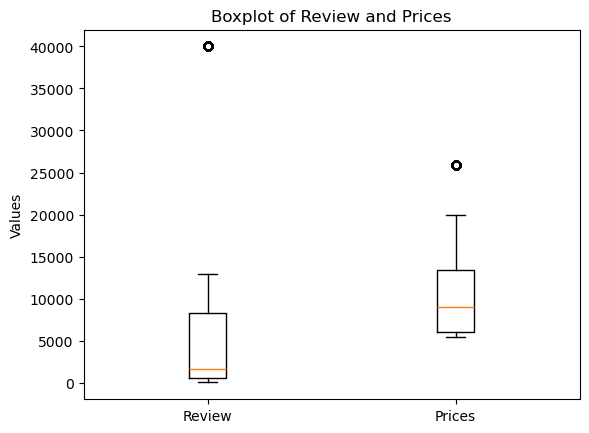

In [370]:
# Now plot boxplot
plt.boxplot([df['Review'].dropna(), df['Prices'].dropna()])
plt.xticks([1, 2], ['Review', 'Prices'])
plt.ylabel('Values')
plt.title('Boxplot of Review and Prices')
plt.show()

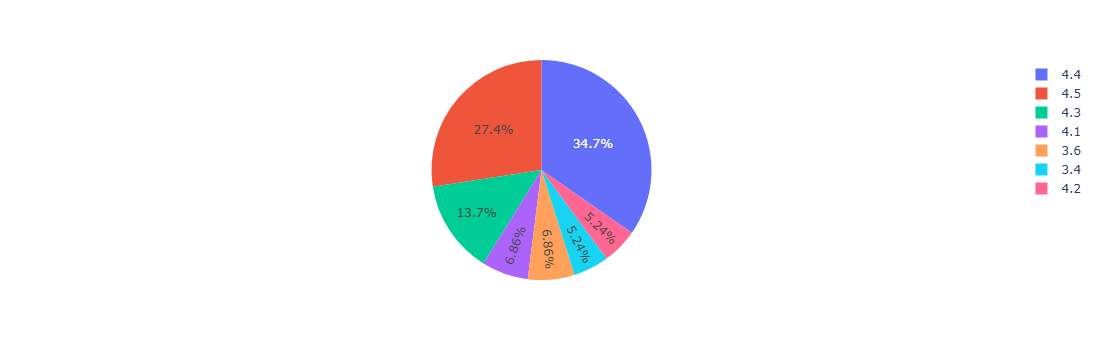

In [371]:
fig = pt.pie(data_frame=df,names='Rating')
fig.show()

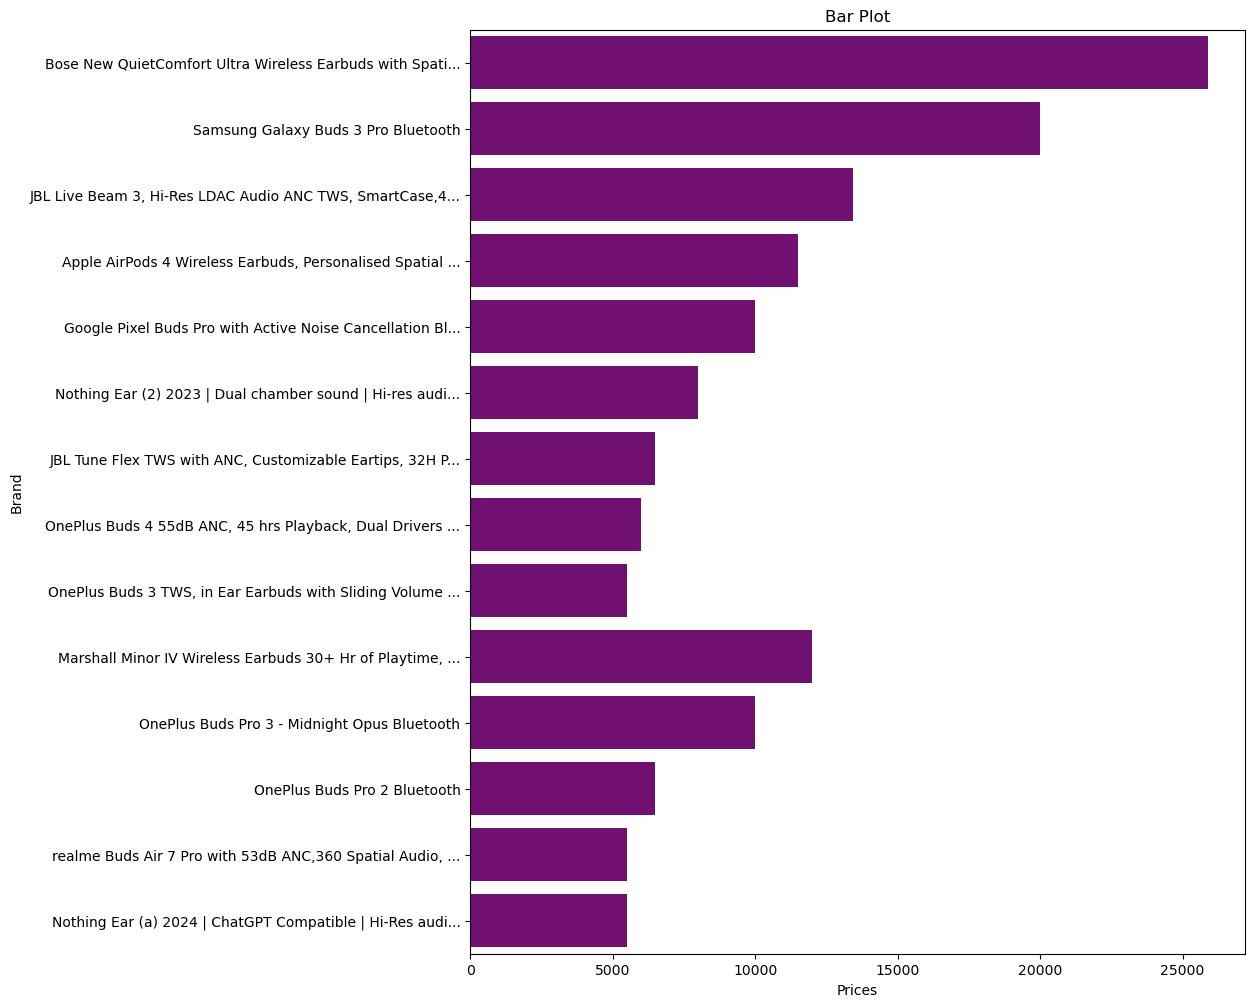

In [372]:
plt.figure(figsize=(10,12))
sns.barplot(x='Prices',y='Brand',data=df,errorbar=None,color='purple')
plt.title('Bar Plot')
plt.show()

In [373]:
selected_columns = ['Rating','Discount','Prices','Review']
df_selected = df[selected_columns]
correlation_matrix = df_selected.corr()

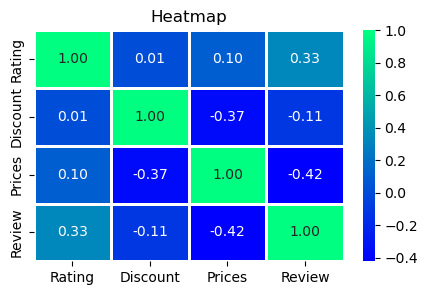

In [374]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix,annot=True,cmap='winter',linewidth=2,fmt=".2f")
plt.title('Heatmap')
plt.show()

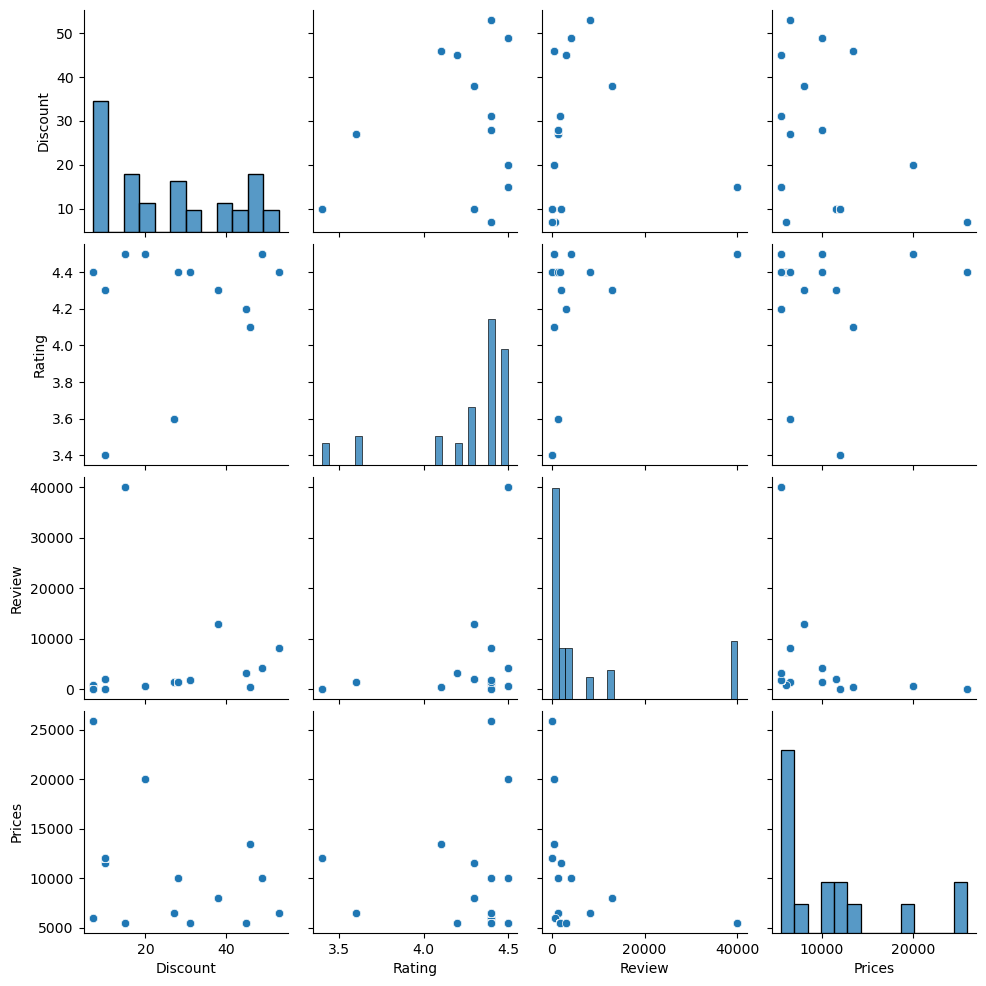

In [375]:
sns.pairplot(df)
plt.show()

## UNSUPERVICED LEARNING

In [461]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [462]:
df = pd.read_csv("Earphones.csv")

In [463]:
df.head()

,Brand,Discount,Rating,Review,Prices
0,Bose New QuietComfort Ultra Wireless Earbuds w...,7,4.4,62,25900.0
1,Samsung Galaxy Buds 3 Pro Bluetooth,20,4.5,570,19999.0
2,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...",46,4.1,499,13428.0
3,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,4.3,1963,11499.0
4,Google Pixel Buds Pro with Active Noise Cancel...,49,4.5,4199,9990.0


In [464]:
df["Rating"].unique()

array([4.4, 4.5, 4.1, 4.3, 3.6, 3.4, 4.2])

In [465]:
df["Prices"].unique()

array([25900., 19999., 13428., 11499.,  9990.,  7999.,  6499.,  5999.,
        5499., 11999.,  9999.,  6481.])

In [466]:
df["Review"].unique()

array([   62,   570,   499,  1963,  4199, 12899,  1346,   786, 39987,
          42,  1443,  8244,  1917,  3170], dtype=int64)

In [467]:
features = df[['Prices', 'Rating', 'Review']].dropna()

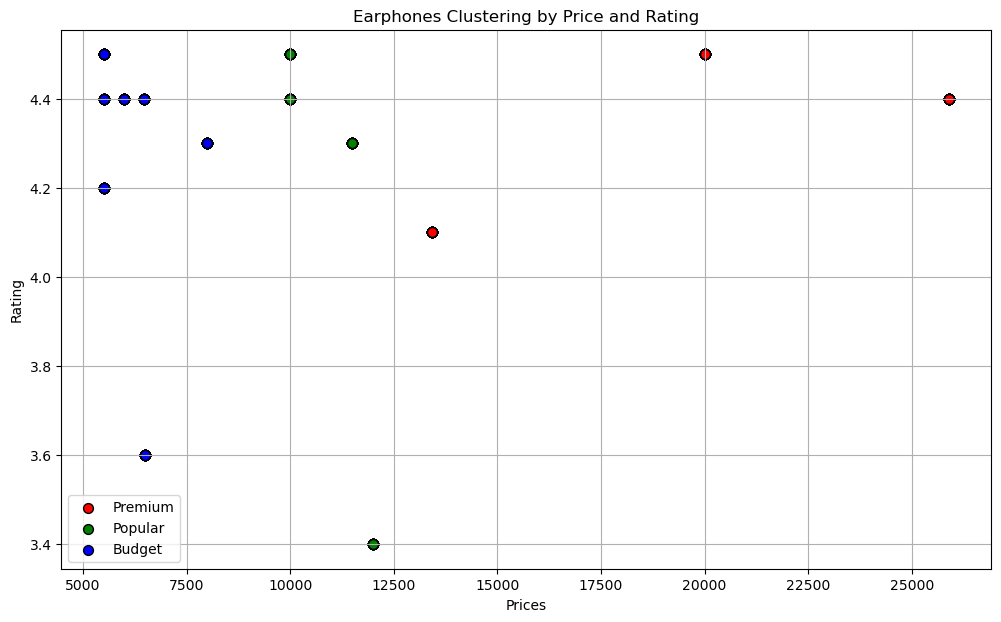

In [481]:
X = df[['Prices']]
# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Map clusters based on Price and Rating
def map_cluster(row):
    price = row['Prices']
    rating = row['Rating']
    if price <= 8000 :
        return 'Budget'
    elif 8000 < price <= 12000 :
        return 'Popular'
    elif price > 12000 :
        return 'Premium'
    else:
        return 'Popular'  # Default fallback

df['ClusterName'] = df.apply(map_cluster, axis=1)

# Plotting
colors = {'Budget': 'blue', 'Popular': 'green', 'Premium': 'red'}

plt.figure(figsize=(12, 7))
for cluster in df['ClusterName'].unique():
    clustered_data = df[df['ClusterName'] == cluster]
    plt.scatter(clustered_data['Prices'], clustered_data['Rating'],
                c=colors[cluster], label=cluster, edgecolor='k', s=50)

plt.title('Earphones Clustering by Price and Rating')
plt.xlabel('Prices')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()


### Budget Headohones

In [485]:
budget_earbuds = df[df['ClusterName'] == 'Budget']
budget_earbuds_df = budget_earbuds[['Brand', 'Discount', 'Prices', 'Rating', 'Review']]
print("Budget Earbuds DataFrame:")
budget_earbuds_df.head()

Budget Earbuds DataFrame:


,Brand,Discount,Prices,Rating,Review
5,Nothing Ear (2) 2023 | Dual chamber sound | Hi...,38,7999.0,4.3,12899
6,"JBL Tune Flex TWS with ANC, Customizable Earti...",27,6499.0,3.6,1346
7,"OnePlus Buds 4 55dB ANC, 45 hrs Playback, Dual...",7,5999.0,4.4,786
8,"OnePlus Buds 3 TWS, in Ear Earbuds with Slidin...",15,5499.0,4.5,39987
9,"OnePlus Buds 3 TWS, in Ear Earbuds with Slidin...",15,5499.0,4.5,39987


### Popular Headohones

In [488]:
budget_earbuds = df[df['ClusterName'] == 'Popular']
budget_earbuds_df = budget_earbuds[['Brand', 'Discount', 'Prices', 'Rating', 'Review']]
print("Budget Earbuds DataFrame:")
budget_earbuds_df.head()

Budget Earbuds DataFrame:


,Brand,Discount,Prices,Rating,Review
3,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,11499.0,4.3,1963
4,Google Pixel Buds Pro with Active Noise Cancel...,49,9990.0,4.5,4199
13,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,11499.0,4.3,1963
14,Google Pixel Buds Pro with Active Noise Cancel...,49,9990.0,4.5,4199
23,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,11499.0,4.3,1963


### Premium Headohones

In [489]:
budget_earbuds = df[df['ClusterName'] == 'Premium']
budget_earbuds_df = budget_earbuds[['Brand', 'Discount', 'Prices', 'Rating', 'Review']]
print("Budget Earbuds DataFrame:")
budget_earbuds_df.head()

Budget Earbuds DataFrame:


,Brand,Discount,Prices,Rating,Review
0,Bose New QuietComfort Ultra Wireless Earbuds w...,7,25900.0,4.4,62
1,Samsung Galaxy Buds 3 Pro Bluetooth,20,19999.0,4.5,570
2,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...",46,13428.0,4.1,499
10,Bose New QuietComfort Ultra Wireless Earbuds w...,7,25900.0,4.4,62
11,Samsung Galaxy Buds 3 Pro Bluetooth,20,19999.0,4.5,570


In [490]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import gradio as gr

In [494]:
np.random.seed(42)
data = {
    'Prices': np.random.uniform(1000, 20000, 100),
    'Rating': np.random.uniform(1, 5, 100),
    'Review': np.random.randint(10, 1000, 100),
    'Discount': np.random.uniform(0, 50, 100)
}
df = pd.DataFrame(data)

# --- Step 2: Scale the features ---
scaler = StandardScaler()
X = df[['Prices', 'Rating', 'Review']]
X_scaled = scaler.fit_transform(X)

# --- Step 3: Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# --- Step 4: Define cluster name mapping ---
cluster_names = {
    0: 'Budget',
    1: 'Popular',
    2: 'Premium'
}

def predict_cluster(price, rating, review, discount):
    
    input_df = pd.DataFrame([[price, rating, review]], columns=['Prices', 'Rating', 'Review'])
    input_scaled = scaler.transform(input_df)
    cluster_num = kmeans.predict(input_scaled)[0]  
    return cluster_names.get(cluster_num, "Unknown Cluster")


iface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Price"),
        gr.Number(label="Rating"),
        gr.Number(label="Review"),
        gr.Number(label="Discount") 
    ],
    outputs=gr.Textbox(label="Cluster Name"),
    title="Earbuds Cluster Prediction",
    description="Enter product details and get the cluster classification (Budget, Popular, Premium)."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.


In [495]:
df

,Prices,Rating,Review,Discount
0,8116.262258,1.125717,929,9.545552
1,19063.571822,3.545642,637,13.423743
2,14907.884894,2.257424,596,24.263994
3,12374.511200,3.034283,634,18.634343
4,3964.354168,4.630266,977,19.734573
...,...,...,...,...
95,10382.116331,2.396838,709,44.334019
96,10931.923758,3.903823,125,13.044681
97,9123.279349,4.588441,200,0.765227
98,1482.963408,4.548346,262,46.671815


# SUPERVICED LEARNING

In [496]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [497]:
df1 = pd.read_csv("Earphones.csv")

In [498]:
df1

,Brand,Discount,Rating,Review,Prices
0,Bose New QuietComfort Ultra Wireless Earbuds w...,7,4.4,62,25900.0
1,Samsung Galaxy Buds 3 Pro Bluetooth,20,4.5,570,19999.0
2,"JBL Live Beam 3, Hi-Res LDAC Audio ANC TWS, Sm...",46,4.1,499,13428.0
3,"Apple AirPods 4 Wireless Earbuds, Personalised...",10,4.3,1963,11499.0
4,Google Pixel Buds Pro with Active Noise Cancel...,49,4.5,4199,9990.0
...,...,...,...,...,...
1045,Marshall Minor IV Wireless Earbuds 30+ Hr of P...,10,3.4,42,11999.0
1046,OnePlus Buds Pro 3 - Midnight Opus Bluetooth,28,4.4,1443,9999.0
1047,OnePlus Buds Pro 2 Bluetooth,53,4.4,8244,6481.0
1048,"realme Buds Air 7 Pro with 53dB ANC,360 Spatia...",31,4.4,1917,5499.0


In [499]:
# Features and target
X = df1[['Discount', 'Rating', 'Review']] 
y = df1['Prices']                         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'k-NN Regressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost Regressor': XGBRegressor(use_label_encoder=False, eval_metric='rmse')
}

print("=== Regression Model Evaluation ===")

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.2f}\n")


=== Regression Model Evaluation ===
Linear Regression:
  MSE: 25479623.83
  RMSE: 5047.73
  R² Score: 0.45

Random Forest Regressor:
  MSE: 0.00
  RMSE: 0.00
  R² Score: 1.00

k-NN Regressor:
  MSE: 0.00
  RMSE: 0.00
  R² Score: 1.00

SVR:
  MSE: 47284851.97
  RMSE: 6876.40
  R² Score: -0.01

XGBoost Regressor:
  MSE: 0.00
  RMSE: 0.00
  R² Score: 1.00



In [500]:
X = df1[['Discount', 'Rating', 'Review']]  
y = df1['Prices']                          

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'k-NN Regressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'XGBoost Regressor': XGBRegressor(use_label_encoder=False, eval_metric='rmse')
}

best_model = None
best_score = -np.inf  # Initialize with a very low value
results = []

print("=== Model Evaluation ===")

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append((name, rmse, r2))
    
    print(f"{name}: RMSE = {rmse:.2f}, R² Score = {r2:.2f}")
    
    # Update best model based on R² score
    if r2 > best_score:
        best_score = r2
        best_model = (name, model)

# Display the best model
print("\n=== Best-Fit Model ===")
print(f"Best Model: {best_model[0]}")
print(f"R² Score: {best_score:.2f}")


=== Model Evaluation ===
Linear Regression: RMSE = 5047.73, R² Score = 0.45
Random Forest Regressor: RMSE = 0.00, R² Score = 1.00
k-NN Regressor: RMSE = 0.00, R² Score = 1.00
SVR: RMSE = 6876.40, R² Score = -0.01
XGBoost Regressor: RMSE = 0.00, R² Score = 1.00

=== Best-Fit Model ===
Best Model: Random Forest Regressor
R² Score: 1.00


In [501]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [502]:

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='f1_weighted', cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best Hyperparameters:")
print(best_params)

print(f"\n Final Test Accuracy: {accuracy:.4f}")
print(f"Final Test F1 Score: {f1:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Final Test Accuracy: 1.0000
Final Test F1 Score: 1.0000


In [503]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import gradio as gr

In [506]:
X = df1[['Review', 'Rating', 'Discount']] 
y = df1['Prices']                        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Random Forest RMSE:", rmse)


def predict_price(review, rating, discount):
    try:
        if isinstance(discount, str):
            discount = float(discount.replace('%', '').strip())
    except:
        return "Invalid discount format"
    input_df = pd.DataFrame([[review, rating, discount]],
                            columns=['Review', 'Rating', 'Discount'])
    predicted_price = best_model.predict(input_df)[0]
    return round(predicted_price, 2)


iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Review"),
        gr.Number(label="Rating"),
        gr.Textbox(label="Discount (e.g., 50%)")
    ],
    outputs=gr.Number(label="Predicted Price"),
    title="Earphones Price Prediction (Best Random Forest)",
    description="Enter Review, Rating, and Discount to predict the product Price."
)
iface.launch()

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest RMSE: 0.0
* Running on local URL:  http://127.0.0.1:7870
* To create a public link, set `share=True` in `launch()`.
